In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

In [3]:
from datamodels.grassy_mnist import get_grassy_mnist
from models.cvae import ContrastiveVAE
from models.vae import VAE
from models.train import train
from datamodels.utils import s_score

In [4]:
BATCH_SIZE = 128
EPOCHS = 100
trials = 10

In [5]:
# cVAE
ss_cvae = {}

scales = np.linspace(0,2,num=9)
for scale in scales:
    target, target_labels, background = get_grassy_mnist(scale=scale)
    ss_scale = []
    for trial in range(trials):
        print(f"scale={scale}; trial={trial}")
        ds = torch.stack([target, background], axis=1)
        dataloader = DataLoader(dataset=ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
        model = ContrastiveVAE(input_dim=28*28, hidden_dim=32, latent_dim=2, tc=True)
    
        optimizer = Adam(model.parameters(), lr=1e-4)
        losses = train(model, dataloader, optimizer, epochs=EPOCHS, plot=False)
        ss, _ = s_score(model.s_encoder, target, target_labels)
        ss_scale.append(ss)

    ss_cvae[scale] = ss_scale

scale=0.0; trial=0
scale=0.0; trial=1
scale=0.0; trial=2
scale=0.0; trial=3
scale=0.0; trial=4
scale=0.0; trial=5
scale=0.0; trial=6
scale=0.0; trial=7
scale=0.0; trial=8
scale=0.0; trial=9
scale=0.25; trial=0
scale=0.25; trial=1
scale=0.25; trial=2
scale=0.25; trial=3
scale=0.25; trial=4
scale=0.25; trial=5
scale=0.25; trial=6
scale=0.25; trial=7
scale=0.25; trial=8
scale=0.25; trial=9
scale=0.5; trial=0
scale=0.5; trial=1
scale=0.5; trial=2
scale=0.5; trial=3
scale=0.5; trial=4
scale=0.5; trial=5
scale=0.5; trial=6
scale=0.5; trial=7
scale=0.5; trial=8
scale=0.5; trial=9
scale=0.75; trial=0
scale=0.75; trial=1
scale=0.75; trial=2
scale=0.75; trial=3
scale=0.75; trial=4
scale=0.75; trial=5
scale=0.75; trial=6
scale=0.75; trial=7
scale=0.75; trial=8
scale=0.75; trial=9
scale=1.0; trial=0
scale=1.0; trial=1
scale=1.0; trial=2
scale=1.0; trial=3
scale=1.0; trial=4
scale=1.0; trial=5
scale=1.0; trial=6
scale=1.0; trial=7
scale=1.0; trial=8
scale=1.0; trial=9
scale=1.25; trial=0
scale=1.25

In [7]:
# VAE
ss_vae = {}

scales = np.linspace(0,2,num=9)
for scale in scales:
    target, target_labels, background = get_grassy_mnist(scale=scale)
    ss_scale = []
    for trial in range(trials):
        print(f"scale={scale}; trial={trial}")
        dataloader = DataLoader(dataset=target, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
        model = VAE(input_dim=28*28, hidden_dim=32, latent_dim=2, use_bias=True)
    
        optimizer = Adam(model.parameters(), lr=1e-4)
        losses = train(model, dataloader, optimizer, epochs=EPOCHS, plot=False)
        ss, _ = s_score(model.encoder, target, target_labels)
        ss_scale.append(ss)

    ss_vae[scale] = ss_scale

scale=0.0; trial=0
scale=0.0; trial=1
scale=0.0; trial=2
scale=0.0; trial=3
scale=0.0; trial=4
scale=0.0; trial=5
scale=0.0; trial=6
scale=0.0; trial=7
scale=0.0; trial=8
scale=0.0; trial=9
scale=0.25; trial=0
scale=0.25; trial=1
scale=0.25; trial=2
scale=0.25; trial=3
scale=0.25; trial=4
scale=0.25; trial=5
scale=0.25; trial=6
scale=0.25; trial=7
scale=0.25; trial=8
scale=0.25; trial=9
scale=0.5; trial=0
scale=0.5; trial=1
scale=0.5; trial=2
scale=0.5; trial=3
scale=0.5; trial=4
scale=0.5; trial=5
scale=0.5; trial=6
scale=0.5; trial=7
scale=0.5; trial=8
scale=0.5; trial=9
scale=0.75; trial=0
scale=0.75; trial=1
scale=0.75; trial=2
scale=0.75; trial=3
scale=0.75; trial=4
scale=0.75; trial=5
scale=0.75; trial=6
scale=0.75; trial=7
scale=0.75; trial=8
scale=0.75; trial=9
scale=1.0; trial=0
scale=1.0; trial=1
scale=1.0; trial=2
scale=1.0; trial=3
scale=1.0; trial=4
scale=1.0; trial=5
scale=1.0; trial=6
scale=1.0; trial=7
scale=1.0; trial=8
scale=1.0; trial=9
scale=1.25; trial=0
scale=1.25

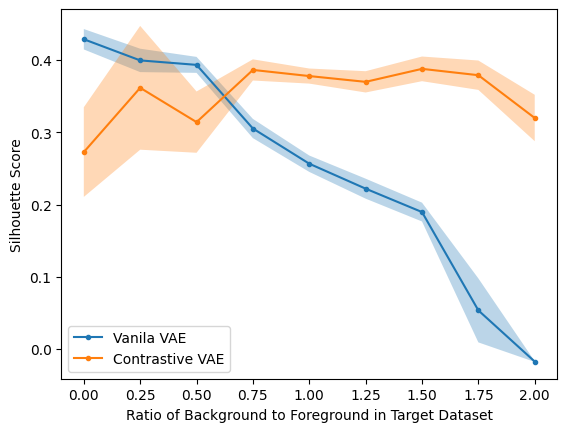

In [52]:
import pandas as pd 

ss_vae_df = pd.DataFrame(ss_vae).T
ss_cvae_df = pd.DataFrame(ss_cvae).T

ss_vae_df["avg"] = ss_vae_df.mean(axis=1)
ss_vae_df["std"] = ss_vae_df.std(ddof=0, axis=1)
ss_vae_df["ub"] = ss_vae_df["avg"] + ss_vae_df["std"]
ss_vae_df["lb"] = ss_vae_df["avg"] - ss_vae_df["std"]

ss_cvae_df["avg"] = ss_cvae_df.mean(axis=1)
ss_cvae_df["std"] = ss_cvae_df.std(ddof=0, axis=1)
ss_cvae_df["ub"] = ss_cvae_df["avg"] + ss_cvae_df["std"]
ss_cvae_df["lb"] = ss_cvae_df["avg"] - ss_cvae_df["std"]

_, ax = plt.subplots()
ax.plot(ss_vae_df["avg"], marker=".", label="Vanila VAE")
ax.fill_between(ss_vae_df.index, ss_vae_df["lb"], ss_vae_df["ub"], alpha=.3)

ax.plot(ss_cvae_df["avg"], marker=".", label="Contrastive VAE")
ax.fill_between(ss_cvae_df.index, ss_cvae_df["lb"], ss_cvae_df["ub"], alpha=.3)

ax.legend()
ax.set_xlabel("Ratio of Background to Foreground in Target Dataset")
ax.set_ylabel("Silhouette Score");

In [55]:
pd.concat([ss_vae_df, ss_cvae_df]).to_csv("sensitivity_analysis_10_trials.csv")